In [38]:
# Import module yang akan digunakan
import pandas as pd 
import cv2
import os 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score 
from sklearn.metrics import confusion_matrix
import seaborn as sns
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [39]:
root = 'jeruk_processed'
fnames = os.listdir(root)

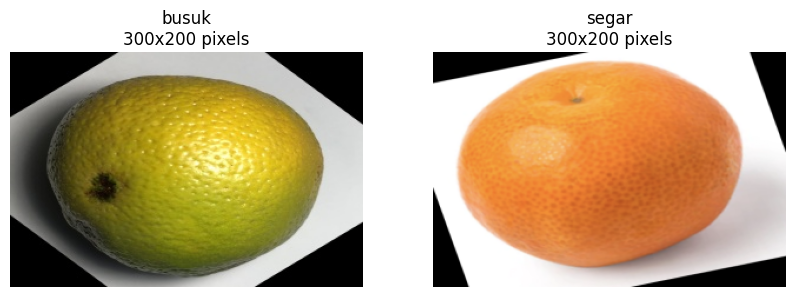

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the categories
categories = ['busuk', 'segar']

# Create a dictionary to hold the path to one image from each category
image_paths = {}

for category in categories:
    category_dir = os.path.join(root, category)
    # List all files in the category directory
    files = os.listdir(category_dir)
    # Select the first image file (assuming there is at least one image in each category)
    if files:
        image_paths[category] = os.path.join(category_dir, files[0])

# Set up the plot
fig, axes = plt.subplots(1, len(categories), figsize=(10, 5))  # Sesuaikan jumlah axes dengan jumlah kategori

# Loop through each category and display the image
for ax, (category, image_path) in zip(axes, image_paths.items()):
    # Load the image
    image = mpimg.imread(image_path)
    # Get image dimensions
    height, width, _ = image.shape
    # Display the image
    ax.imshow(image)
    ax.set_title(f'{category}\n{width}x{height} pixels')
    ax.axis('off')  # Turn off the axis

# Show the plot
plt.show()

In [41]:
import os

root = 'jeruk_processed'
# Pastikan bahwa path ke folder benar. Jika folder tidak berada di direktori yang sama dengan notebook,
# Anda perlu menyediakan path lengkap.
fnames = os.listdir(root)
len(fnames)  # Ini akan mencetak daftar nama file dalam folder tersebut.

2

In [42]:
import cv2
import os
import numpy as np

# Define the categories
categories = ['busuk', 'segar']

# Dictionary untuk menyimpan fitur dan label
features = []
labels = []

# Loop melalui setiap kategori
for category in categories:
    category_dir = os.path.join(root, category)
    files = os.listdir(category_dir)
    for file in files:
        # Membaca gambar
        img_path = os.path.join(category_dir, file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konversi warna ke RGB

        # Ekstraksi fitur warna rata-rata
        avg_color_per_row = np.average(img, axis=0)
        avg_color = np.average(avg_color_per_row, axis=0)
        avg_color = avg_color / 255.0  # Normalisasi jika diperlukan

        # Menambahkan fitur dan label ke dalam list
        features.append(avg_color)
        labels.append(category)

# Konversi list ke numpy array untuk pemrosesan lebih lanjut
features = np.array(features)
labels = np.array(labels)

In [43]:
# Menampilkan 5 fitur pertama dan labelnya
for i in range(5):
    print("Fitur:", features[i], "Label:", labels[i])

Fitur: [0.49831275 0.4721949  0.26378915] Label: busuk
Fitur: [0.25703039 0.27339542 0.1838451 ] Label: busuk
Fitur: [0.56876405 0.43035758 0.29467634] Label: busuk
Fitur: [0.54413229 0.49025124 0.26446314] Label: busuk
Fitur: [0.44515196 0.39355294 0.1966383 ] Label: busuk


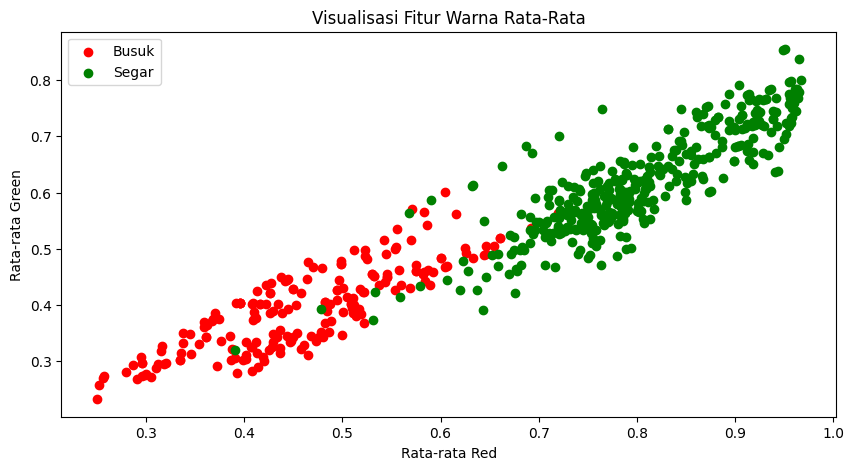

In [44]:
import matplotlib.pyplot as plt

# Plot fitur untuk kategori 'busuk'
busuk_features = [features[i] for i in range(len(features)) if labels[i] == 'busuk']
busuk_features = np.array(busuk_features)

# Plot fitur untuk kategori 'segar'
segar_features = [features[i] for i in range(len(features)) if labels[i] == 'segar']
segar_features = np.array(segar_features)

plt.figure(figsize=(10, 5))
plt.scatter(busuk_features[:, 0], busuk_features[:, 1], color='red', label='Busuk')
plt.scatter(segar_features[:, 0], segar_features[:, 1], color='green', label='Segar')
plt.title('Visualisasi Fitur Warna Rata-Rata')
plt.xlabel('Rata-rata Red')
plt.ylabel('Rata-rata Green')
plt.legend()
plt.show()

In [45]:
import pandas as pd

# Membuat DataFrame dari fitur dan label
df = pd.DataFrame(features, columns=['Rata-Rata Red', 'Rata-Rata Green', 'Rata-Rata Blue'])
df['Label'] = labels

# Menampilkan statistik deskriptif
print(df.describe())

       Rata-Rata Red  Rata-Rata Green  Rata-Rata Blue
count     589.000000       589.000000      589.000000
mean        0.685609         0.541967        0.378849
std         0.187778         0.136715        0.129244
min         0.249792         0.232686        0.122233
25%         0.519223         0.435482        0.286766
50%         0.742946         0.555865        0.380007
75%         0.819552         0.636993        0.470740
max         0.967033         0.854782        0.710555


In [46]:
print("Jumlah nilai null per kolom:")
print(df.isnull().sum())

Jumlah nilai null per kolom:
Rata-Rata Red      0
Rata-Rata Green    0
Rata-Rata Blue     0
Label              0
dtype: int64


In [47]:
import cv2
import os
import numpy as np
import pandas as pd

# Define the categories
categories = ['busuk', 'segar']

# Dictionary untuk menyimpan fitur dan label
features = []
labels = []

# Loop melalui setiap kategori
for category in categories:
    category_dir = os.path.join(root, category)
    files = os.listdir(category_dir)
    for file in files:
        # Membaca gambar
        img_path = os.path.join(category_dir, file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konversi warna ke RGB

        # Ekstraksi fitur warna rata-rata untuk setiap channel
        mean_red = np.mean(img[:, :, 0])
        mean_green = np.mean(img[:, :, 1])
        mean_blue = np.mean(img[:, :, 2])

        # Menambahkan fitur ke dalam list
        features.append([mean_red, mean_green, mean_blue])
        labels.append(category)

# Konversi list ke DataFrame untuk pemrosesan lebih lanjut
df_features = pd.DataFrame(features, columns=['Mean Red', 'Mean Green', 'Mean Blue'])
df_features['Label'] = labels

# Menampilkan beberapa data pertama
print(df_features)

       Mean Red  Mean Green   Mean Blue  Label
0    127.069750  120.409700   67.266233  busuk
1     65.542750   69.715833   46.880500  busuk
2    145.034833  109.741183   75.142467  busuk
3    138.753733  125.014067   67.438100  busuk
4    113.513750  100.356000   50.142767  busuk
..          ...         ...         ...    ...
584  184.091350  145.096733   94.886383  segar
585  200.739400  153.075983   85.511767  segar
586  181.198783  147.418067   92.383233  segar
587  199.144983  148.017033  119.181833  segar
588  172.128783  127.166800  103.803483  segar

[589 rows x 4 columns]


In [48]:
import cv2
import os
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

# Define the categories
categories = ['busuk', 'segar']

# Dictionary untuk menyimpan fitur dan label
features = []
labels = []

# Loop melalui setiap kategori
for category in categories:
    category_dir = os.path.join(root, category)
    files = os.listdir(category_dir)
    for file in files:
        # Membaca gambar
        img_path = os.path.join(category_dir, file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konversi warna ke RGB

        # Ekstraksi fitur warna rata-rata untuk setiap channel
        mean_red = np.mean(img[:, :, 0])
        mean_green = np.mean(img[:, :, 1])
        mean_blue = np.mean(img[:, :, 2])

        # Ekstraksi fitur standar deviasi untuk setiap channel
        std_red = np.std(img[:, :, 0])
        std_green = np.std(img[:, :, 1])
        std_blue = np.std(img[:, :, 2])

        # Ekstraksi fitur skewness untuk setiap channel
        skew_red = skew(img[:, :, 0].flatten())
        skew_green = skew(img[:, :, 1].flatten())
        skew_blue = skew(img[:, :, 2].flatten())

        # Ekstraksi fitur kurtosis untuk setiap channel
        kurt_red = kurtosis(img[:, :, 0].flatten())
        kurt_green = kurtosis(img[:, :, 1].flatten())
        kurt_blue = kurtosis(img[:, :, 2].flatten())

        # Menambahkan fitur ke dalam list
        features.append([
            mean_red, mean_green, mean_blue,
            std_red, std_green, std_blue,
            skew_red, skew_green, skew_blue,
            kurt_red, kurt_green, kurt_blue
        ])
        labels.append(category)

# Konversi list ke DataFrame untuk pemrosesan lebih lanjut
df_features = pd.DataFrame(features, columns=[
    'Mean Red', 'Mean Green', 'Mean Blue',
    'Std Red', 'Std Green', 'Std Blue',
    'Skew Red', 'Skew Green', 'Skew Blue',
    'Kurt Red', 'Kurt Green', 'Kurt Blue'
])
df_features['Label'] = labels

# Menampilkan beberapa data pertama
print(df_features)

       Mean Red  Mean Green   Mean Blue     Std Red  Std Green    Std Blue  \
0    127.069750  120.409700   67.266233   79.974382  76.058047   75.488305   
1     65.542750   69.715833   46.880500   57.260591  57.016730   61.869501   
2    145.034833  109.741183   75.142467   43.500679  54.604537   74.915141   
3    138.753733  125.014067   67.438100   60.660202  58.445996   73.513995   
4    113.513750  100.356000   50.142767   63.001354  61.009018   65.507880   
..          ...         ...         ...         ...        ...         ...   
584  184.091350  145.096733   94.886383   95.216638  82.274293   86.493586   
585  200.739400  153.075983   85.511767   93.354450  78.297000   76.552285   
586  181.198783  147.418067   92.383233   92.788498  80.193951   84.121837   
587  199.144983  148.017033  119.181833   94.546932  90.294597   99.110310   
588  172.128783  127.166800  103.803483  106.427361  96.230730  102.466962   

     Skew Red  Skew Green  Skew Blue  Kurt Red  Kurt Green  Kur

In [49]:

# Define the categories
categories = ['busuk', 'segar']
root = 'jeruk_processed'  # Sesuaikan dengan path folder utama Anda

# Dictionary untuk menyimpan fitur dan label
features = []
labels = []
folders = []

# Loop melalui setiap kategori
for category in categories:
    category_dir = os.path.join(root, category)
    files = os.listdir(category_dir)
    for file in files:
        # Membaca gambar
        img_path = os.path.join(category_dir, file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konversi warna ke RGB

        # Ekstraksi fitur
        mean_red = np.mean(img[:, :, 0])
        mean_green = np.mean(img[:, :, 1])
        mean_blue = np.mean(img[:, :, 2])
        std_red = np.std(img[:, :, 0])
        std_green = np.std(img[:, :, 1])
        std_blue = np.std(img[:, :, 2])
        skew_red = skew(img[:, :, 0].flatten())
        skew_green = skew(img[:, :, 1].flatten())
        skew_blue = skew(img[:, :, 2].flatten())
        kurt_red = kurtosis(img[:, :, 0].flatten())
        kurt_green = kurtosis(img[:, :, 1].flatten())
        kurt_blue = kurtosis(img[:, :, 2].flatten())

        # Menambahkan fitur ke dalam list
        features.append([
            mean_red, mean_green, mean_blue,
            std_red, std_green, std_blue,
            skew_red, skew_green, skew_blue,
            kurt_red, kurt_green, kurt_blue
        ])
        labels.append(category)
        folders.append(category_dir)  # Menambahkan path folder

# Konversi list ke DataFrame
df_features = pd.DataFrame(features, columns=[
    'Mean Red', 'Mean Green', 'Mean Blue',
    'Std Red', 'Std Green', 'Std Blue',
    'Skew Red', 'Skew Green', 'Skew Blue',
    'Kurt Red', 'Kurt Green', 'Kurt Blue'
])
df_features['Label'] = labels

# Menampilkan beberapa data pertama
print(df_features.head())

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

# Define the categories
categories = ['busuk', 'segar']
root = 'jeruk_processed'  # Sesuaikan dengan path folder utama Anda

# Dictionary untuk menyimpan fitur dan label
features = []
labels = []

# Loop melalui setiap kategori
for category in categories:
    category_dir = os.path.join(root, category)
    files = os.listdir(category_dir)
    for file in files:
        # Membaca gambar
        img_path = os.path.join(category_dir, file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konversi warna ke RGB

        # Ekstraksi fitur
        mean_red = np.mean(img[:, :, 0])
        mean_green = np.mean(img[:, :, 1])
        mean_blue = np.mean(img[:, :, 2])
        std_red = np.std(img[:, :, 0])
        std_green = np.std(img[:, :, 1])
        std_blue = np.std(img[:, :, 2])
        skew_red = skew(img[:, :, 0].flatten())
        skew_green = skew(img[:, :, 1].flatten())
        skew_blue = skew(img[:, :, 2].flatten())
        kurt_red = kurtosis(img[:, :, 0].flatten())
        kurt_green = kurtosis(img[:, :, 1].flatten())
        kurt_blue = kurtosis(img[:, :, 2].flatten())

        # Menambahkan fitur ke dalam list
        features.append([
            mean_red, mean_green, mean_blue,
            std_red, std_green, std_blue,
            skew_red, skew_green, skew_blue,
            kurt_red, kurt_green, kurt_blue
        ])
        labels.append(category)
        folders.append(category_dir)  # Menambahkan path folder

# Konversi list ke DataFrame
df_features = pd.DataFrame(features, columns=[
    'Mean Red', 'Mean Green', 'Mean Blue',
    'Std Red', 'Std Green', 'Std Blue',
    'Skew Red', 'Skew Green', 'Skew Blue',
    'Kurt Red', 'Kurt Green', 'Kurt Blue'
])
df_features['Label'] = labels

# Menyimpan DataFrame ke CSV
csv_path = os.path.join(root, 'features.csv')
df_features.to_csv(csv_path, index=False)
print(f"Fitur telah disimpan ke {csv_path}")

# Menampilkan beberapa data pertama
print(df_features.head())

Fitur telah disimpan ke jeruk_processed\features.csv
     Mean Red  Mean Green  Mean Blue    Std Red  Std Green   Std Blue  \
0  127.069750  120.409700  67.266233  79.974382  76.058047  75.488305   
1   65.542750   69.715833  46.880500  57.260591  57.016730  61.869501   
2  145.034833  109.741183  75.142467  43.500679  54.604537  74.915141   
3  138.753733  125.014067  67.438100  60.660202  58.445996  73.513995   
4  113.513750  100.356000  50.142767  63.001354  61.009018  65.507880   

   Skew Red  Skew Green  Skew Blue  Kurt Red  Kurt Green  Kurt Blue  Label  \
0 -0.315425   -0.257770   1.131607 -1.208263   -1.154271  -0.272135  busuk   
1  1.051823    0.923405   1.437833  0.024735   -0.085215   0.463185  busuk   
2 -0.288802    0.616292   0.715719 -0.582679   -0.870908  -1.133486  busuk   
3 -0.558972   -0.045847   1.295495  0.109947    0.223813   0.174783  busuk   
4 -0.208076    0.280163   1.823472 -0.416075   -0.107804   1.953835  busuk   

                  Folder  
0  jeruk_pro